# Problem Set 1

**Due: October 5th, 12am**

In this first Problem Set, we will review some of the theoretical concepts from statistics, 
linear regression, and linear classification that we studied in class. You will then be asked 
to use your knowledge on regression models, together with tools from scikit-learn and pandas to do prediction on financial time series. 

 - The weight of each exercice is indicated under brackets as "[x] points". 
 
 - if you cannot finish an exercice, don't hesitate to come to office hours after class with possible questions. Also start by finishing all the exercices which look easier to you.
 
 
 **The assignment will be graded on [30] points (16 points theory, 14 points programming)**

## 1. Statistics 

**Total value of this part is [6] points**

1\.1 [3]points (Source: Murphy) We want to use the Bayesian framework to infer the rate of a Bernoulli distribution. The Bernoulli distribution is used to model the outcome of a coin toss experiment. In particular, for this experiment, we observe $N_1$ heads and $N_0$ tails

 - Show that when using as prior a _Beta distribution_, with parameters $\alpha,\beta$, the MAP in this case is given by 
    
    $$\hat{\theta} = \frac{N_1+\alpha-1}{N+\alpha+\beta-2}$$
        
        
 - We now decide to change the prior and use the following distribution
 
 $$p(\theta) = \left\{\begin{array}{ll}
 0.5 & \text{if }\theta = 0.5\\0.4 & \text{if }\theta = 0.4\\0 &\text{otherwise}\end{array}\right.$$        
  Derive the MAP for this second prior as a function of $N_1$ and $N$.
    
    
      
1\.2\. [3]points (Source: Murphy) We get $n$ samples $x_1,x_2,\ldots, x_n$ from a Gaussian random variable with known variance $\sigma^2$ but unknown mean $\mu$. To guess the value for $\mu$, we also decide to assume a Gaussian distribution for our prior, $\mu\sim \mathcal{N}(m,s^2)$ with fixed mean $m$ and variance $s^2$. (The only unknown is $\mu$)


 - Calculate the expression for the MAP estimate $\hat{\mu}_{MAP}$. You can give the result without proof or, alternatively, with a lot more work, you can compute derivatives of the log posterior, set them to zero and solve.
 - Show that as the number of samples increases, the MAP estimate converges to the Maximum likelihood estimate.


## 2. Linear Regression and classification

**Total value of this part is [10] points**

2\.1\. [3]points **Mitigating false predictions.** Assume you want to learn a regression model, $\beta_0 + \langle \bf \beta, \bf x\rangle$ from some patterns $\left\{\bf x_{\mu}, t_\mu\right\}_{\mu}$. Among the $N$ patterns that you have at your disposal, some of them have been corrupted by the noisy measurement device more than other. To deal with the difference in the quality of the patterns, you decide to consider a weighted loss
    $$\ell(\beta) = \frac{1}{2}\sum_{\mu=1}^N w_\mu\left\{t_\mu - \langle \boldsymbol \beta, \boldsymbol x_\mu\rangle\right\}^2$$
    which associates larger weights $w_n$ to patterns which have been acquired through higher quality measurements. Give another interpretation of the loss function above in terms of replicated patterns.


2\.2\. [4]points **Regression with multiple outputs.**(source: HTF) We want to do regression on a set of multidimensional patterns $(\boldsymbol x_{\mu}, \boldsymbol y_{\mu})$. I.e each input $\bf x_{i} \in \mathbb{R}^{p+1\times 1}$ is used to predict $K$ outputs $y_{i,k}\in \mathbb{R}$. In particular, we want to use $K$ different regression models $\boldsymbol \beta_k \in \mathbb{R}^{p+1\times 1}$ for each of these outputs $\boldsymbol y_{i,k}$. 
    The measurements are corrupted by a noise $\varepsilon$, so that they read as
    $$Y_{i,k} = \langle \boldsymbol \beta_k, \boldsymbol x_i\rangle + \varepsilon_k$$
    We further let $\boldsymbol \Sigma = \mathbb{E}\boldsymbol \varepsilon\boldsymbol \varepsilon^T$ to denote the covariance of the noise $\varepsilon = (\varepsilon_1,\ldots, \varepsilon_K)$.
    
Now let us group the $K$ labels generated from input $\boldsymbol x_i$ in the vector $\boldsymbol y_i = (y_{i,1},\ldots, y_{i,K})^T \in \mathbb{R}^{K\times 1}$, and group the regression coefficients in the vector $f(\boldsymbol x_i)\in \mathbb{R}^{K\times 1}$, as 
    $$f(\boldsymbol x_i) = \left[\begin{array}{c}
        \langle \boldsymbol \beta_1,\boldsymbol x_i\rangle\\
        \vdots\\
        \langle \boldsymbol \beta_K,\boldsymbol x_i\rangle
        \end{array}\right]$$
        
 - Show that the solution to the multivariate regression problem
    $$\text{RSS}(\boldsymbol B,\boldsymbol \Sigma) = \sum_{i=1}^N (\boldsymbol y_i - f(\boldsymbol x_i) )^T\boldsymbol \Sigma^{-1} (\boldsymbol y_i - f(\boldsymbol x_i) )$$
    
    is given by $\hat{\boldsymbol B} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol Y$ where 
    
    $$\hat{\boldsymbol B} = \left[\hat{\boldsymbol \beta}_1, ..., \hat{\boldsymbol \beta}_K \right],\boldsymbol X = \left[\begin{array}{c}
    \boldsymbol x_1^T\\
    \vdots\\
    \boldsymbol x_N^T
    \end{array}\right],\boldsymbol Y = \left[\begin{array}{c}
    \boldsymbol y_1^T\\
    \vdots\\
    \boldsymbol y^T_N
    \end{array}\right]$$
        
 -  How does that change if we replace $\boldsymbol \Sigma$ with a different covariance matrix $\boldsymbol \Sigma_i$ for each pattern $i$?

2\.3\. [3]points(source: HTF) The simple (RSS) linear regression model is known to be the best unbiased linear estimator. However, it is sometimes possible to improve the prediction error by lowering the variance and increasing the bias. When some of the variables are correlated for example, a good idea could be to use LASSO regularization. In this case, the estimate $\hat{\boldsymbol \beta}$ is given by the solution of the following optimization program

\begin{align*}\hat{\boldsymbol \beta}^{\text{lasso}} = arg\min_{\boldsymbol \beta}   &\sum_{i=1}^{N} \left(y_i - \beta_0 - \sum_{j=1}^px_{ij}\beta_{j}\right)^2\\
\text{subject to}& \sum_{j=1}^p |\beta_j|\leq t.
\end{align*}


We fix the threshold $t$ and we let $\hat{\boldsymbol \beta}_{\text{lasso}}$ denote the estimate you would obtain for the original set of patterns $(\boldsymbol x_i,y_i)$, $i=1,\ldots, N$ with the $j^{th}$ value in $\hat{\boldsymbol \beta}_{\text{lasso}}$ given by $(\hat{\boldsymbol \beta}_{\text{lasso}}) = a$. Suppose that you augment your set of features with one additional copy of $\boldsymbol x_{\cdot,j}$ (i.e the $j^{th}$ component of $x$) and let us use $(\hat{\boldsymbol \beta}^*_{\text{lasso}})$ to denote the new estimate. Charaterize the effect of this change by comparing the set of solutions for $(\hat{\boldsymbol \beta}_{\text{lasso}})_j$ and $(\hat{\boldsymbol \beta}^*_{\text{lasso}})_j$


## 3. Programming

**Total value of this part is [14] points**

In this part, you will be asked to implement the simple linear regression and classification models we studied in class on some practical datasets.

### 3.1 Regression

**3.1.1 predicting Google future stock value** [6] points

1\. To start, use the following piece of code to download financial data from yahoo finance using. In class, we have predicted housing prices. We will now see whether linear regression can give us some insights on future stock values. 

[*********************100%***********************]  1 of 1 downloaded
DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
       

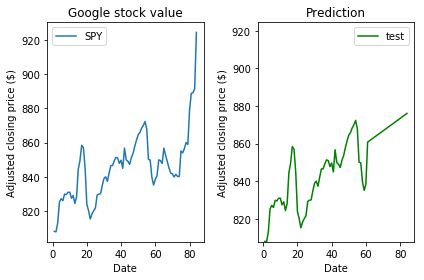

In [1]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr

import matplotlib.pyplot as plt

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data1 = pdr.get_data_yahoo("GOOGL", start="2017-01-01", end="2017-04-30")



close = data1['Close']

all_weekdays = pd.date_range(start="2017-01-01", end="2017-04-30", freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')


msft = close#.loc['SPY']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

msft = msft.dropna()
#msft_norm = (msft - msft.mean()) / (msft.max() - msft.min())


tmp = msft.index
numDays = tmp.shape[0]

days = np.arange(1,numDays+1)

# normalized prices
print(msft.index)


tmp1 = 60

X_train = days[0:tmp1]
X_test = days[tmp1:]

y_train = msft[0:tmp1]
y_test = msft[tmp1:]

# Applying the regression model

from sklearn.linear_model import LinearRegression

print(X_train.transpose)
print(y_train.values)

print(X_train.shape)
tmp = y_train.values
print(tmp.shape)

lr = LinearRegression().fit(X_train.reshape(-1,1),tmp.reshape(-1,1))

pred = lr.predict(X_test.reshape(-1,1))


# #training a linear prediction model


#fig, axes = plt.subplots(nrows=1, ncols=2)
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2,1)


#fig, ax = plt.subplots(figsize=(8,5))
plt.plot(days, msft, label='GOOGL')
#axes[0,0].plot(X_train.reshape(-1,1), tmp.reshape(-1,1), label='training')
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.legend()
plt.title('Google stock value')

plt.subplot(1, 2,2)
plt.plot(np.concatenate((X_train, X_test),axis = 0), np.concatenate((tmp.reshape(-1,1),pred),axis=0), 'green',label='test')
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.legend()
plt.title('Prediction')
plt.ylim((np.amin(msft),np.amax(msft)))

fig.tight_layout() 

plt.show()



1\. As you can see the simplest linear regression model does not achieve impressive predictions. Using the $\texttt{Pipeline}$ and $\texttt{Polynomial feature}$ methods from $\texttt{scikit-learn}$, try to get a better prediction with degree two polynomial features.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## put your code here



**3.1.2. Would you have predicted the 2008 crisis?** [3] points. Still using the code above, download the S&P 500 between 2007 and 2009 (use the index ^GSPC). Build a regression model until approx. January 1 2008. Then predict the end of the year 2008. 

In [ ]:
# put your code here



Measure your error with the MSE

### 3.2 Classification

**3.2.1 Classifying flowers** [5] points

In this section we will build and train a simple logistic regression classifier and use it to 
distriminate between three classes using a majority vote

Start by downloading the dataset (for example) from Kaggle : https://www.kaggle.com/aceccon/2-iris-dataset-basic-classification-algorithms/data, then store it into a pandas data frame (use the .read_csv method)

or import it directly from the scikit-learn dataset module using the lines below

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#%pylab inline

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

from sklearn import datasets
from sklearn.decomposition import PCA

# IRIS
iris = datasets.load_iris()

Only keep the first two features from this dataset and store the result into the array X

In [ ]:
# put your code here


Plot the corresponding data using the lines below

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

How many classes are there ? We now want to learn a logistic regression classifier for 
each of the class. As we saw, logistic regression outputs a value between 0 and 1 representing the probability that a point belong to one of two classes. There are two "easy" to extend the logistic regression classifier to multiple classes. briefly describe those approaches below

Put your answers here

 - 
    
 - 

We will use the one-vs-one with a majority vote. Start by splitting the set of patterns between a training and a test part

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

Then loop over the classes in the training set to learn logistic classifiers for each pair of classes. You can use the $\texttt{linear_model.LogisticRegression}$) module from scikit-learn but you must loop over the classes. I.e do not use the multiclass option of the scikit-learn implementation.

In [ ]:
# put your code here

Measure the quality of your classification by estimating the ratio of misclassified instances to the total instances in 
the test set